# Testing decoder functionality

In [2]:
import decoders
import numpy as np
import matplotlib.pyplot as plt
import torch
import decoders.linear_decoders

### Ridge Regression Model Tests

In [3]:

fake_x = np.random.rand(100,4)
fake_y = 2 * fake_x + np.random.rand(100,1)*0.1 # arbitrary function + noise

rr = decoders.linear_decoders.ridge_regression(4,1,{'theta':0, 'lbda':0.1, 'intercept':False})

rr.train(fake_x, fake_y)
yhat = rr.forward(fake_x)


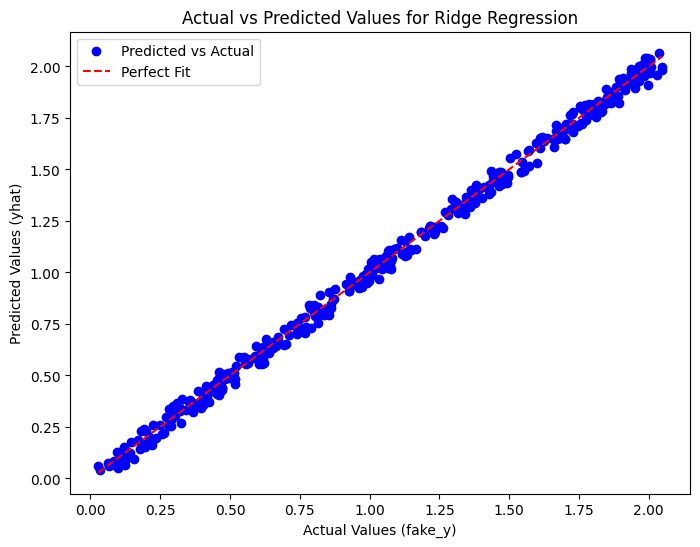

In [4]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(fake_y, yhat, color='blue', label='Predicted vs Actual')

# Add a 45-degree reference line for perfect prediction
plt.plot([fake_y.min(), fake_y.max()], [fake_y.min(), fake_y.max()], color='red', linestyle='--', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Values (fake_y)')
plt.ylabel('Predicted Values (yhat)')
plt.title('Actual vs Predicted Values for Ridge Regression')
plt.legend()

# Display the plot
plt.show()

In [8]:
# Test saving
rr.save_model("test_folder/test_save_RR.pk1")
print("Saved!")

# Test loading
rr.load_model("test_folder/test_save_RR.pk1")
print("Loaded!")

Saved!
Loaded!


### Kalman Filter Model Tests

100%|██████████| 99/99 [00:00<00:00, 23854.55it/s]

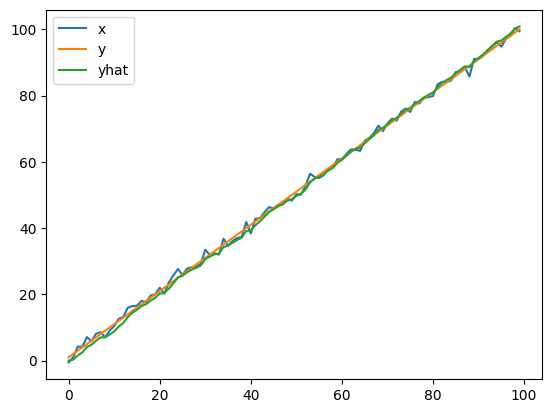

Mean Squared Error: 0.9214076995849609
Saved!
Loaded!


In [10]:
# Set up Data
N = 100

# linear relationship (simulated data)
X = torch.arange(N, dtype=torch.float32).reshape((N, 1)) + torch.randn(N, 1) + 1
y = torch.arange(N, dtype=torch.float32).reshape((N, 1)) + 1


model_config = {
    'append_ones_y': False,
    "device": "cpu",
    "start_y": None,
    "return_tensor":True
}

# Instantiate Train Model
model = decoders.linear_decoders.KalmanFilter(0,0,model_config)
model.train(X, y)

# Make Prediction
yhat = model.forward(X)


# Plot (yhat should follow y, it should infer hidden state from noisy x)
plt.plot(X, label='x')
plt.plot(y, label='y')
plt.plot(yhat, label='yhat')
plt.legend()
plt.show()


# MSE calculation
mse = torch.mean((yhat - y) ** 2)
print(f"Mean Squared Error: {mse}")

# Test saving
model.save_model("test_folder/test_KF.pk1")
print("Saved!")

# Test loading
model.load_model("test_folder/test_KF.pk1")
print("Loaded!")